In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("Chennai Daily Rainfall Data.csv")

In [3]:
print(df.shape)


(21416, 5)


In [4]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   _id       21416 non-null  int64  
 1   District  21416 non-null  object 
 2   Station   21416 non-null  object 
 3   Rainfall  21416 non-null  float64
 4   Date      21416 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 836.7+ KB


,_id,District,Station,Rainfall,Date
0,1,Chennai,Chennai port trust,10.0,1993-03-03T00:00:00
1,2,Chennai,Chennai port trust,10.0,1993-03-03T00:00:00
2,3,Chennai,Sholinganallur,2.0,1993-03-03T00:00:00
3,4,Chennai,Chennai nungambakkam,2.0,1993-03-03T00:00:00
4,5,Chennai,Sholinganallur,46.1,1993-05-16T00:00:00
...,...,...,...,...,...
21411,21412,Chennai,Sholinganallur,0.2,2023-12-22T00:00:00
21412,21413,Chennai,Royapuram,0.6,2023-12-23T00:00:00
21413,21414,Chennai,Royapuram,0.2,2023-12-24T00:00:00
21414,21415,Chennai,Zone 14 U41 Perungudi,0.2,2023-12-25T00:00:00


In [5]:
df.head()

,_id,District,Station,Rainfall,Date
0,1,Chennai,Chennai port trust,10.0,1993-03-03T00:00:00
1,2,Chennai,Chennai port trust,10.0,1993-03-03T00:00:00
2,3,Chennai,Sholinganallur,2.0,1993-03-03T00:00:00
3,4,Chennai,Chennai nungambakkam,2.0,1993-03-03T00:00:00
4,5,Chennai,Sholinganallur,46.1,1993-05-16T00:00:00


In [6]:
df.isnull().sum()

_id         0
District    0
Station     0
Rainfall    0
Date        0
dtype: int64

In [7]:
df.describe()

,_id,Rainfall
count,21416.000000,21416.000000
mean,10708.500000,18.279057
std,6182.411018,28.925106
min,1.000000,0.010000
25%,5354.750000,2.000000
50%,10708.500000,7.400000
75%,16062.250000,22.500000
max,21416.000000,348.300000


In [8]:
df.nunique()
df

,_id,District,Station,Rainfall,Date
0,1,Chennai,Chennai port trust,10.0,1993-03-03T00:00:00
1,2,Chennai,Chennai port trust,10.0,1993-03-03T00:00:00
2,3,Chennai,Sholinganallur,2.0,1993-03-03T00:00:00
3,4,Chennai,Chennai nungambakkam,2.0,1993-03-03T00:00:00
4,5,Chennai,Sholinganallur,46.1,1993-05-16T00:00:00
...,...,...,...,...,...
21411,21412,Chennai,Sholinganallur,0.2,2023-12-22T00:00:00
21412,21413,Chennai,Royapuram,0.6,2023-12-23T00:00:00
21413,21414,Chennai,Royapuram,0.2,2023-12-24T00:00:00
21414,21415,Chennai,Zone 14 U41 Perungudi,0.2,2023-12-25T00:00:00


In [9]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month_name()
df['Year'].dtype

dtype('int32')

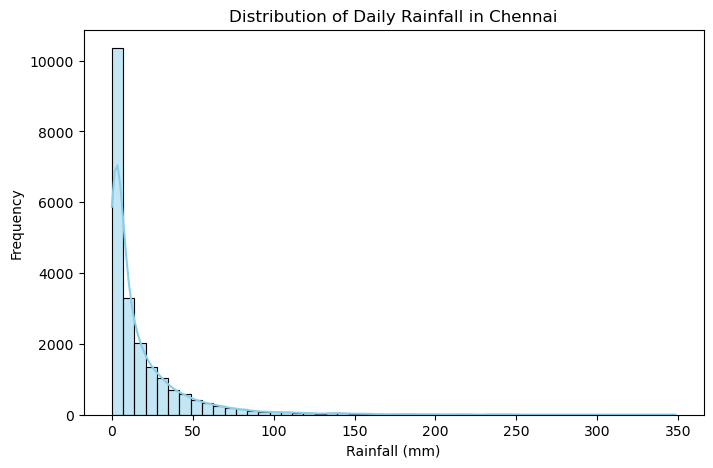

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df["Rainfall"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Daily Rainfall in Chennai")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

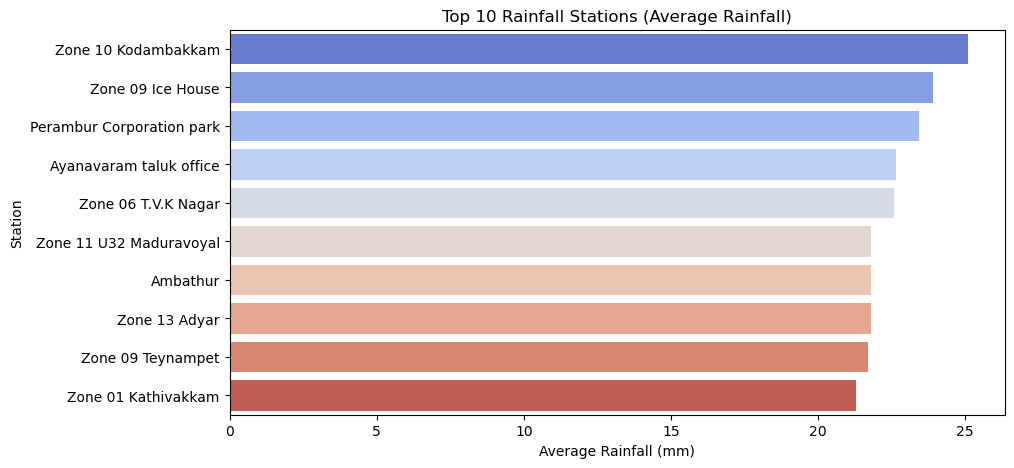

In [11]:
plt.figure(figsize=(10,5))
top_stations = df.groupby("Station")["Rainfall"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_stations.values, y=top_stations.index, palette="coolwarm")
plt.title("Top 10 Rainfall Stations (Average Rainfall)")
plt.xlabel("Average Rainfall (mm)")
plt.ylabel("Station")
plt.show()

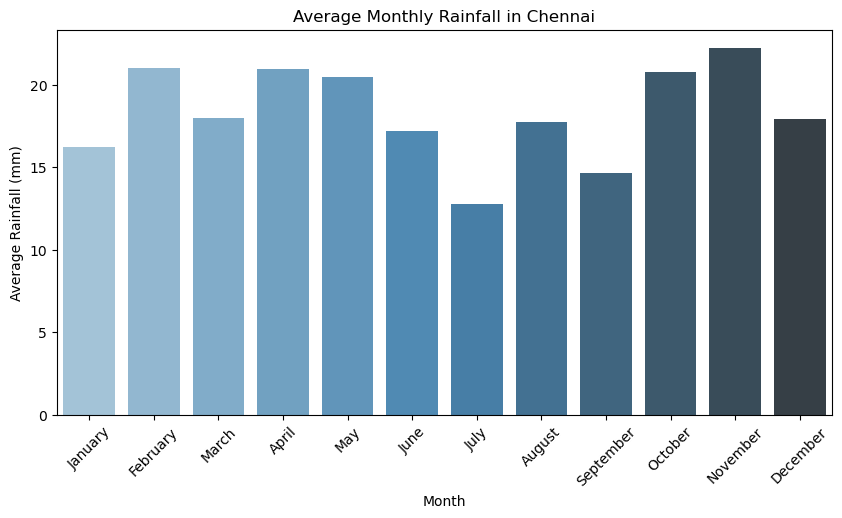

In [12]:
plt.figure(figsize=(10,5))
month_avg = df.groupby("Month")["Rainfall"].mean().reindex([
    "January","February","March","April","May","June","July",
    "August","September","October","November","December"
])
sns.barplot(x=month_avg.index, y=month_avg.values, palette="Blues_d")
plt.title("Average Monthly Rainfall in Chennai")
plt.xticks(rotation=45)
plt.ylabel("Average Rainfall (mm)")
plt.show()

In [13]:
df

,_id,District,Station,Rainfall,Date,Year,Month
0,1,Chennai,Chennai port trust,10.0,1993-03-03,1993,March
1,2,Chennai,Chennai port trust,10.0,1993-03-03,1993,March
2,3,Chennai,Sholinganallur,2.0,1993-03-03,1993,March
3,4,Chennai,Chennai nungambakkam,2.0,1993-03-03,1993,March
4,5,Chennai,Sholinganallur,46.1,1993-05-16,1993,May
...,...,...,...,...,...,...,...
21411,21412,Chennai,Sholinganallur,0.2,2023-12-22,2023,December
21412,21413,Chennai,Royapuram,0.6,2023-12-23,2023,December
21413,21414,Chennai,Royapuram,0.2,2023-12-24,2023,December
21414,21415,Chennai,Zone 14 U41 Perungudi,0.2,2023-12-25,2023,December


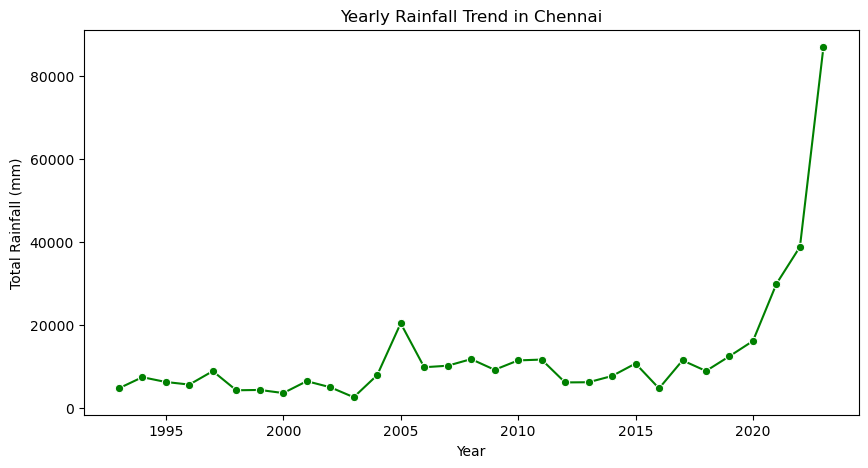

In [14]:
plt.figure(figsize=(10,5))
yearly = df.groupby("Year")["Rainfall"].sum()
sns.lineplot(x=yearly.index, y=yearly.values, marker="o", color="green")
plt.title("Yearly Rainfall Trend in Chennai")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.show()

In [15]:
Q1 = df["Rainfall"].quantile(0.25)
Q3 = df["Rainfall"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Rainfall"] < lower_bound) | (df["Rainfall"] > upper_bound)]
print(f"\nTotal Outliers Detected: {len(outliers)}")


Total Outliers Detected: 1799


In [16]:
print("\n----- Sample Outliers -----")
print(outliers.head())


----- Sample Outliers -----
     _id District               Station  Rainfall       Date  Year    Month
216  217  Chennai    Chennai port trust      65.7 1993-10-15  1993  October
217  218  Chennai    Chennai port trust      65.7 1993-10-15  1993  October
218  219  Chennai        Sholinganallur      55.9 1993-10-15  1993  October
219  220  Chennai  Chennai nungambakkam      55.9 1993-10-15  1993  October
286  287  Chennai        Sholinganallur      61.9 1993-10-11  1993  October


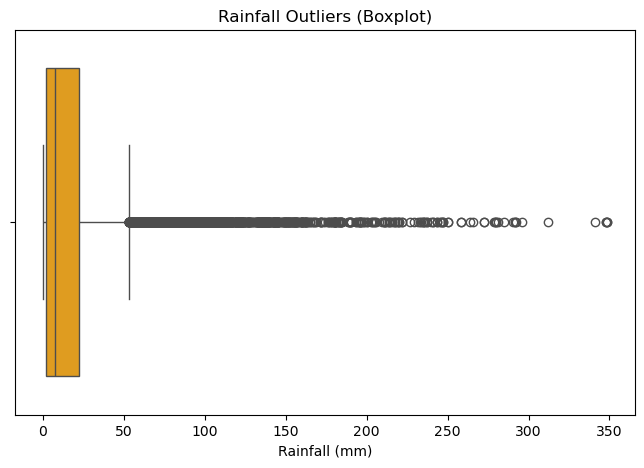

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Rainfall"], color="orange")
plt.title("Rainfall Outliers (Boxplot)")
plt.xlabel("Rainfall (mm)")
plt.show()
